In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('btc_eth_data.csv')

In [3]:
import seaborn as sns

In [4]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,BTCUSDT,ETHUSDT
BTCUSDT,1.000000,0.867429
ETHUSDT,0.867429,1.000000


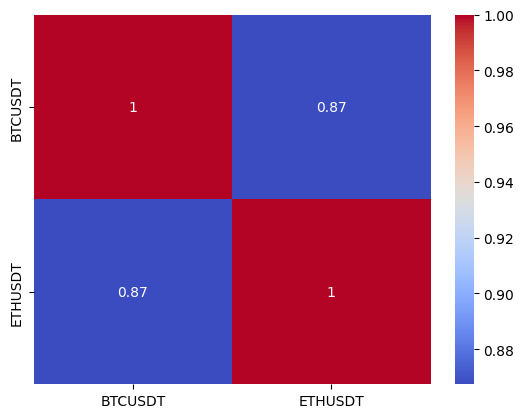

In [7]:
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
df.describe()

,BTCUSDT,ETHUSDT
count,731.000000,731.000000
mean,35564.741696,2386.533434
std,14218.957542,981.754210
min,15781.290000,995.130000
25%,21522.365000,1566.150000
50%,36244.550000,2161.120000
75%,46630.870000,3131.035000
max,67525.830000,4807.980000


In [13]:
df

,timestamp,BTCUSDT,ETHUSDT
0,2021-03-18,57648.16,1776.08
1,2021-03-19,58030.01,1809.10
2,2021-03-20,58102.28,1806.10
3,2021-03-21,57351.56,1782.98
4,2021-03-22,54083.25,1680.97
...,...,...,...
726,2023-03-14,24670.41,1699.40
727,2023-03-15,24285.66,1649.96
728,2023-03-16,24998.78,1673.73
729,2023-03-17,27395.13,1789.27


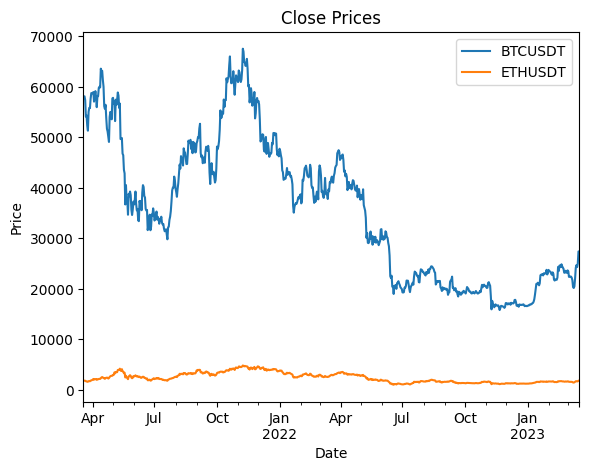

In [14]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['timestamp'])

# Set the date column as the index
df.set_index('date', inplace=True)

# Plot the close prices
df.plot()

# Set the plot title and axis labels
plt.title('Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the plot
plt.show()


NORMALISER

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['BTCUSDT_NORM'] = scaler.fit_transform(df[['BTCUSDT']])
df['ETHUSDT_NORM'] = scaler.fit_transform(df[['ETHUSDT']])



In [36]:
df = df.drop('timestamp', axis=1 )

In [37]:
df

,BTCUSDT,ETHUSDT,BTCUSDT_NORM,ETHUSDT_NORM
date,,,,
2021-03-18,57648.16,1776.08,0.809107,0.204821
2021-03-19,58030.01,1809.10,0.816487,0.213481
2021-03-20,58102.28,1806.10,0.817883,0.212694
2021-03-21,57351.56,1782.98,0.803375,0.206630
2021-03-22,54083.25,1680.97,0.740213,0.179876
...,...,...,...,...
2023-03-14,24670.41,1699.40,0.171789,0.184710
2023-03-15,24285.66,1649.96,0.164353,0.171743
2023-03-16,24998.78,1673.73,0.178135,0.177977


In [47]:
df_norm = df.drop(['BTCUSDT', 'ETHUSDT'] , axis = 1)

In [48]:
df_norm

,BTCUSDT_NORM,ETHUSDT_NORM
date,,
2021-03-18,0.809107,0.204821
2021-03-19,0.816487,0.213481
2021-03-20,0.817883,0.212694
2021-03-21,0.803375,0.206630
2021-03-22,0.740213,0.179876
...,...,...
2023-03-14,0.171789,0.184710
2023-03-15,0.164353,0.171743
2023-03-16,0.178135,0.177977


<Axes: xlabel='date'>

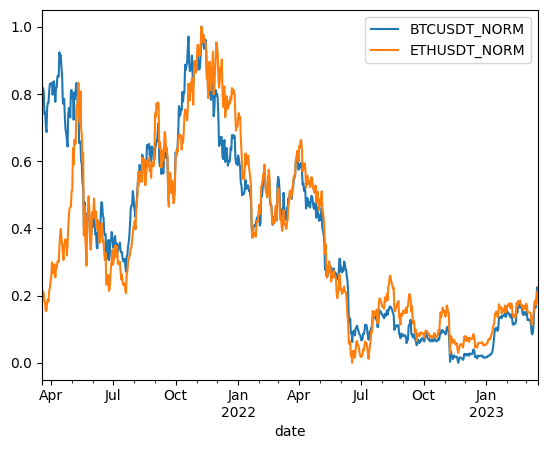

In [51]:
df_norm.plot()

In [52]:
corr2_matrix = df_norm.corr(numeric_only=True)
corr2_matrix

,BTCUSDT_NORM,ETHUSDT_NORM
BTCUSDT_NORM,1.000000,0.867429
ETHUSDT_NORM,0.867429,1.000000


In [56]:
from statsmodels.tsa.stattools import coint

# Load data for the two pairs
pair1 = df_norm['BTCUSDT_NORM']
pair2 = df_norm['ETHUSDT_NORM']

# Compute the cointegration test
score, pvalue, _ = coint(pair1, pair2)

# Print the results
print("Cointegration test score: ", score)
print("p-value: ", pvalue)


Cointegration test score:  -4.89049850348501
p-value:  0.0002604071299380927


In [58]:
from statsmodels.tsa.stattools import coint

# Load data for the two pairs
pair1c = df['BTCUSDT']
pair2c = df['ETHUSDT']

# Compute the cointegration test
score2, pvalue2, _ = coint(pair1c, pair2c)

# Print the results
print("Cointegration test score: ", score2)
print("p-value: ", pvalue2)


Cointegration test score:  -4.89049850348501
p-value:  0.0002604071299380927
